# Body_performance_Multiclass_classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
df_raw=pd.read_csv('bodyPerformance.csv')

In [3]:
df=df_raw.copy()

In [4]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [6]:
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

# Data_Processing

### gender

In [7]:
df.dtypes['gender']

dtype('O')

In [8]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [9]:
df['gender']=df['gender'].map({'M':1, 'F':0})

In [10]:
df['gender'].unique()

array([1, 0], dtype=int64)

## class 

In [11]:
df.dtypes['class']

dtype('O')

In [12]:
df['class'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

### ( A: best) 

In [13]:
df['class']=df['class'].map({'C':3, 'A':1, 'B':2, 'D':4})

In [14]:
df['class'].unique()

array([3, 1, 2, 4], dtype=int64)

In [15]:
df.dtypes['class']

dtype('int64')

## EDA

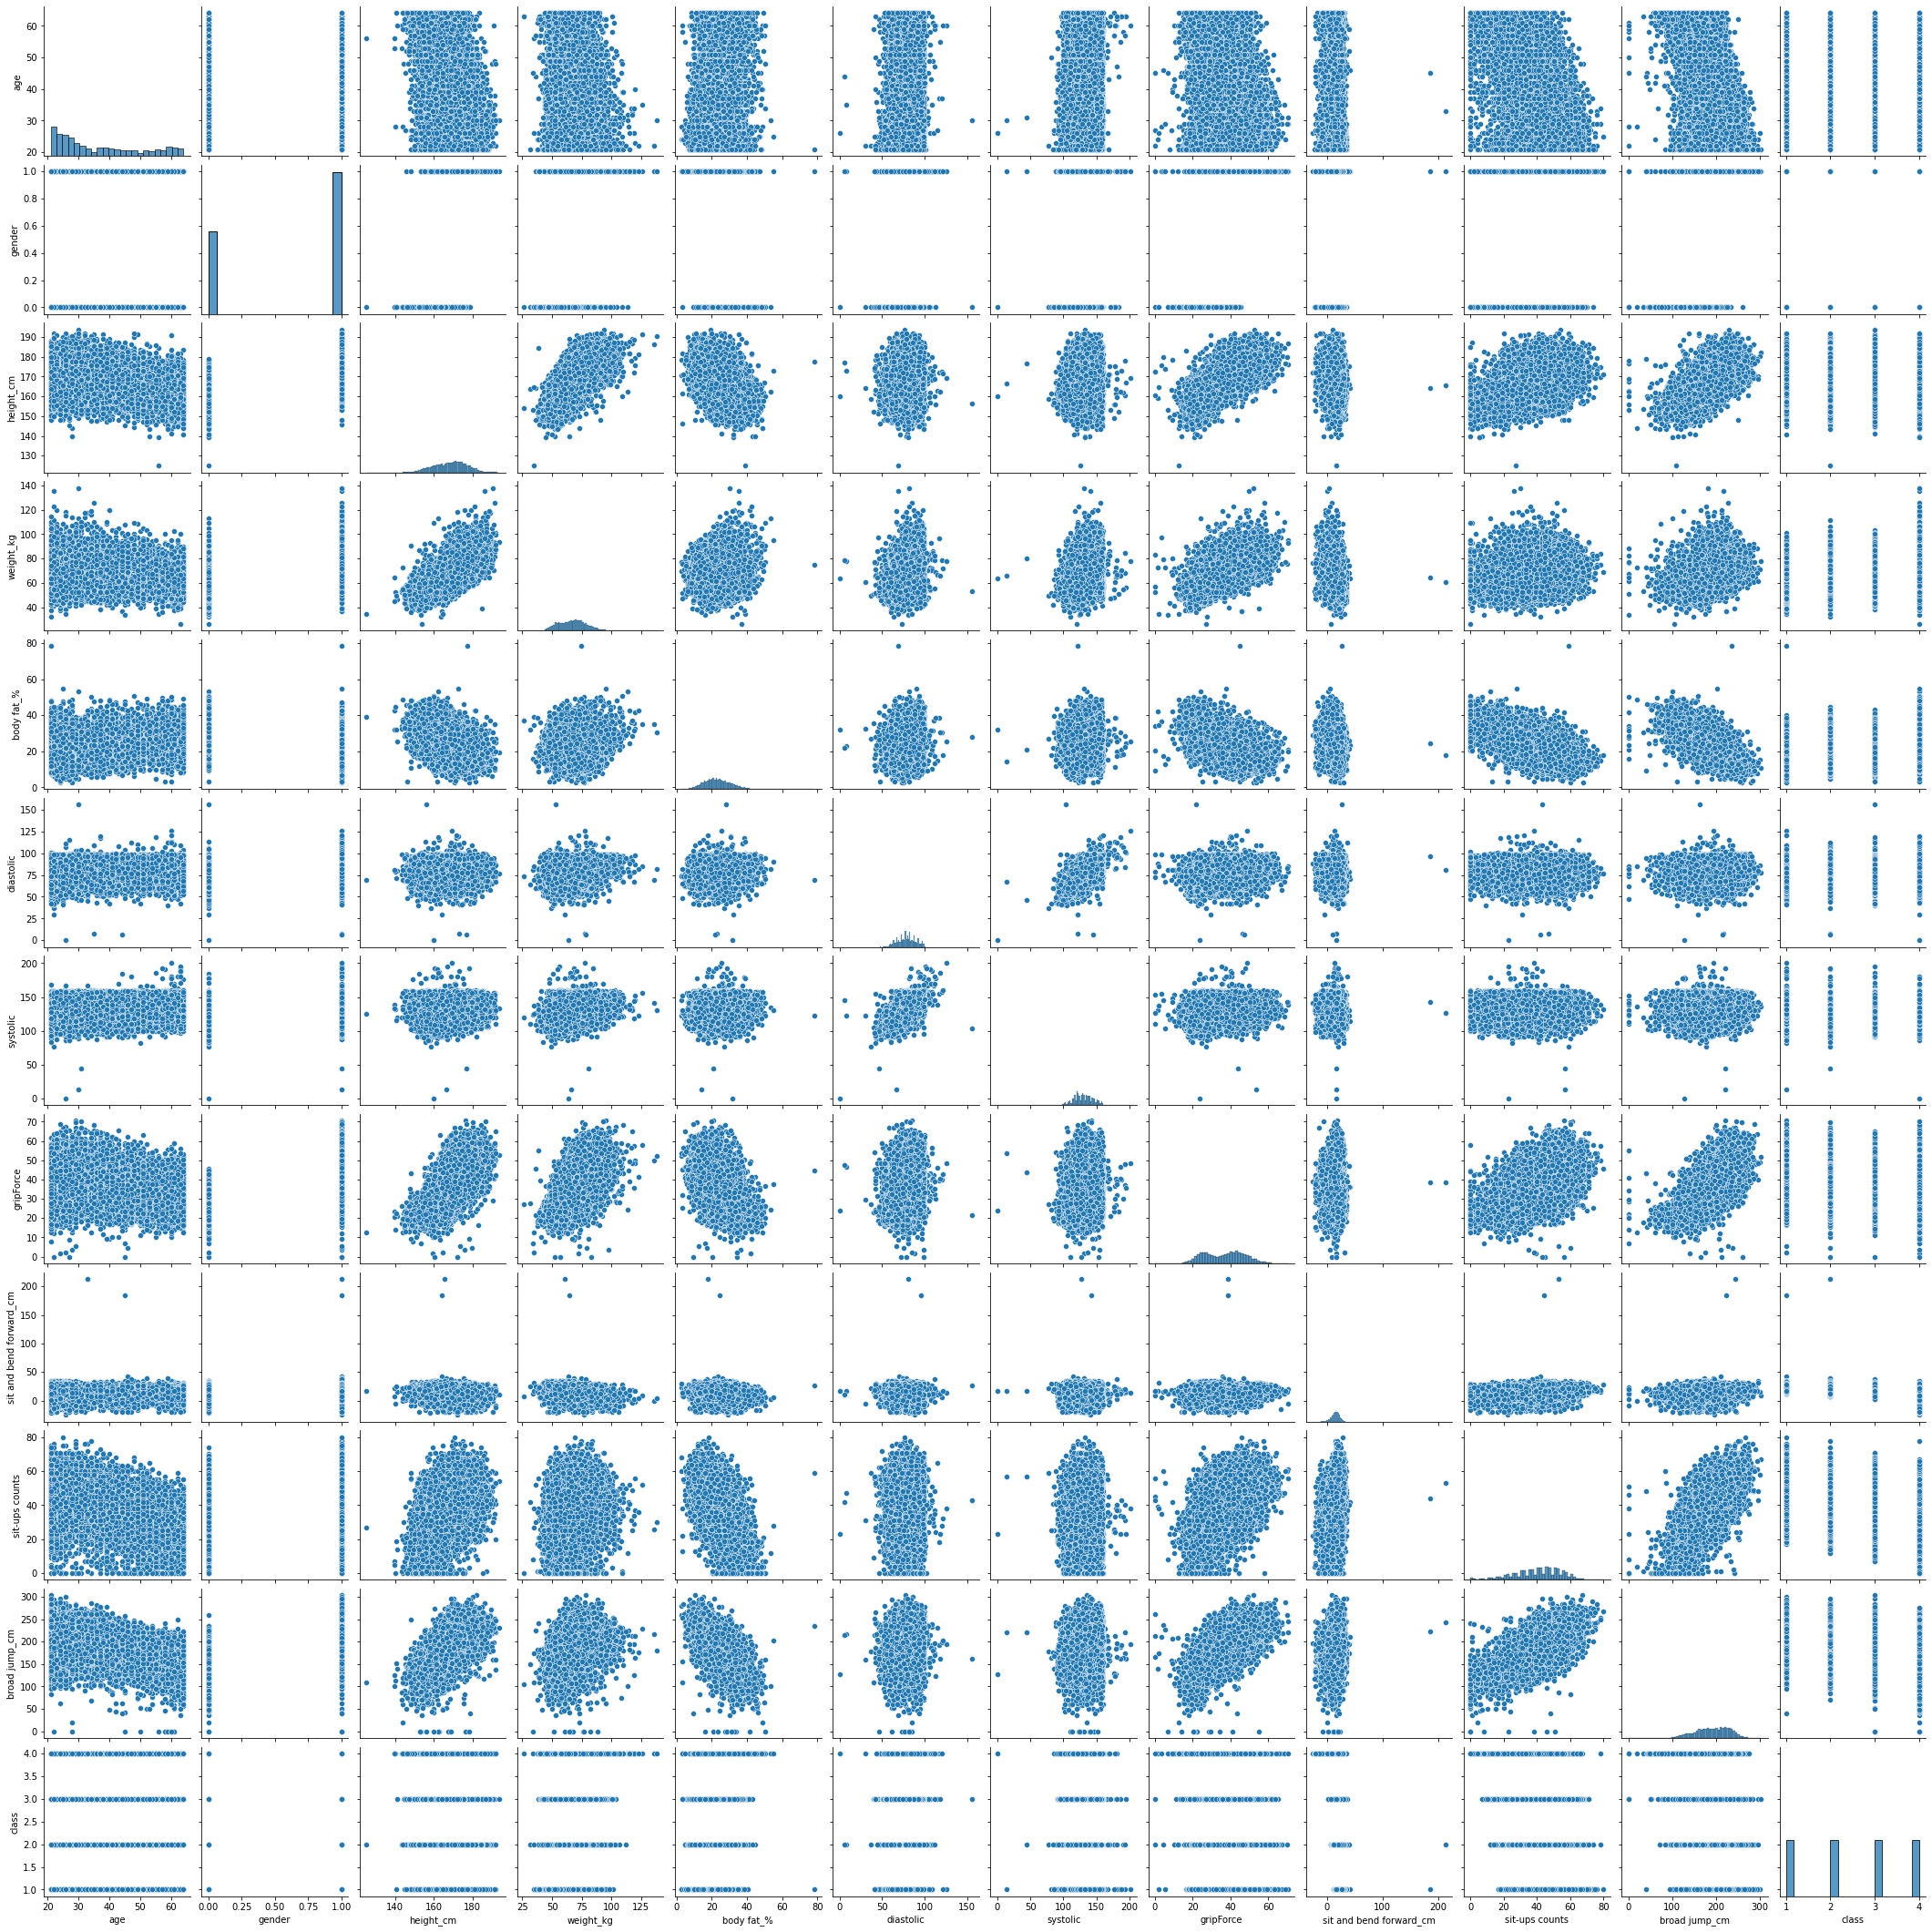

In [16]:
sns.pairplot(df)

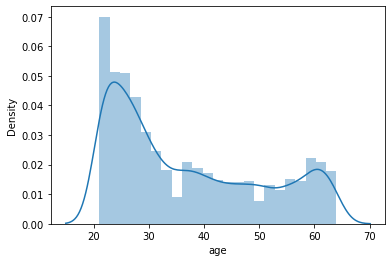

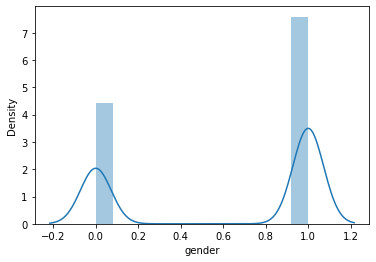

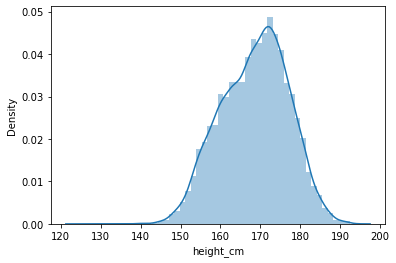

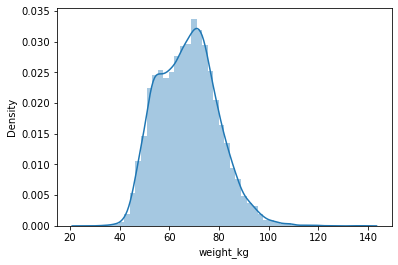

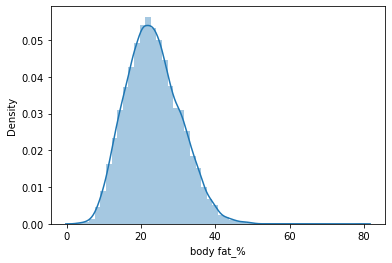

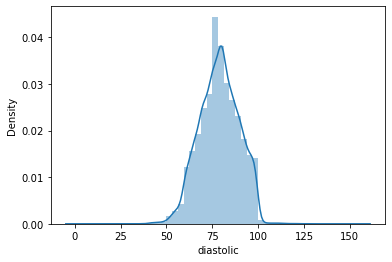

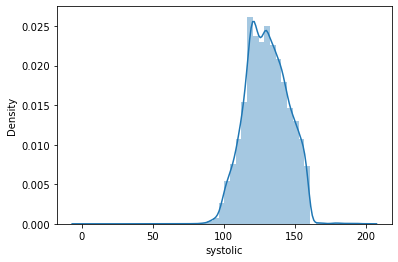

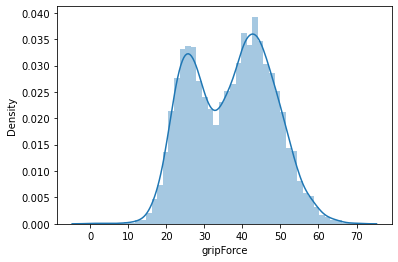

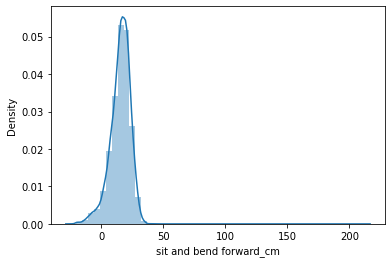

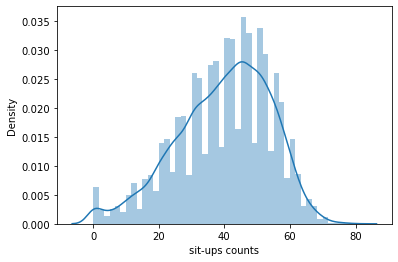

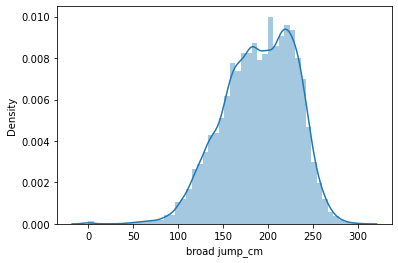

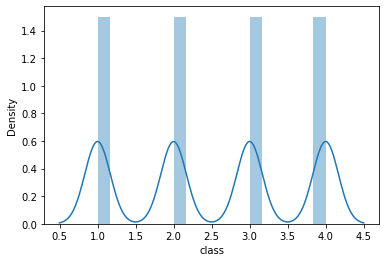

In [17]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

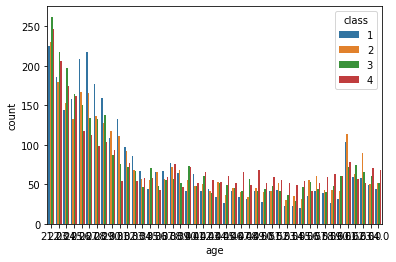

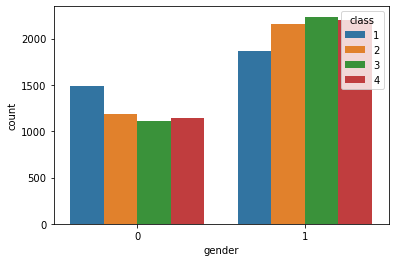

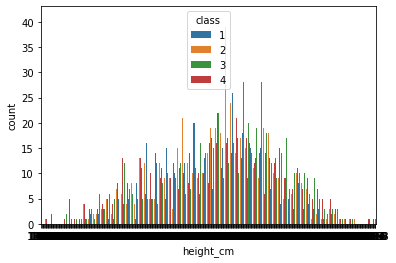

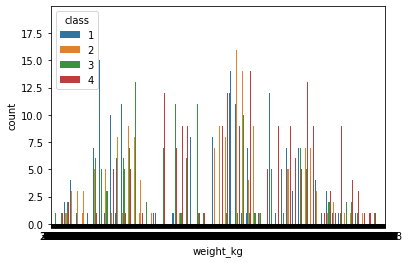

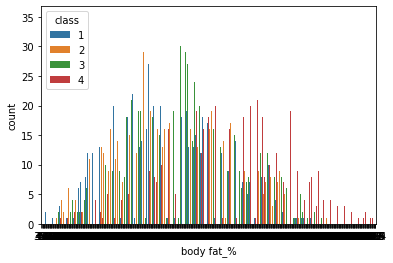

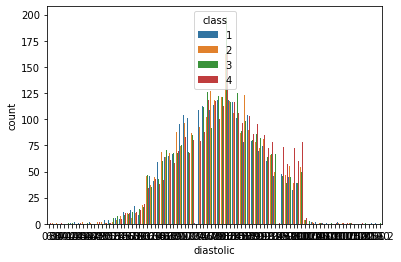

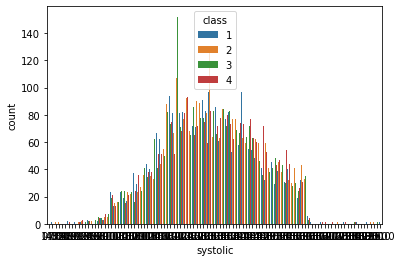

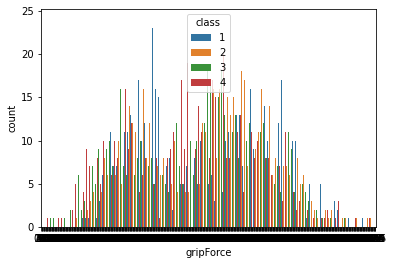

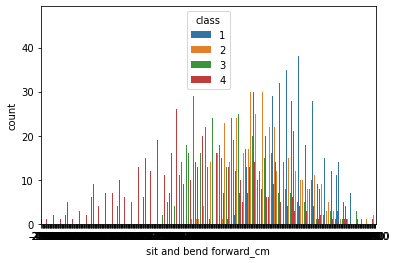

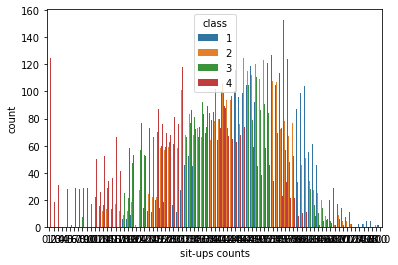

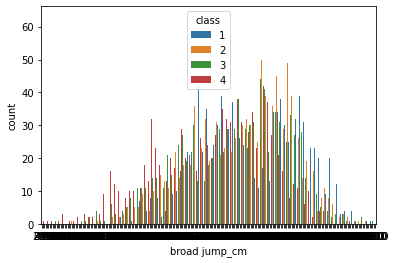

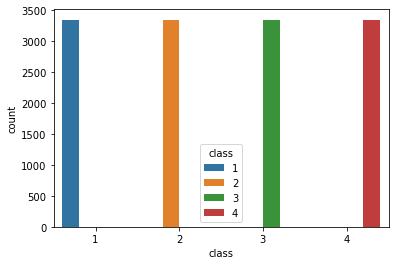

In [18]:
for i in df.columns:
    sns.countplot(df[i],hue=df['class'])
    plt.show()

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,13393.0,36.775106,13.625639,21.0,25.0,32.0,48.0,64.0
gender,13393.0,0.632196,0.482226,0.0,0.0,1.0,1.0,1.0
height_cm,13393.0,168.559807,8.426583,125.0,162.4,169.2,174.8,193.8
weight_kg,13393.0,67.447316,11.949666,26.3,58.2,67.4,75.3,138.1
body fat_%,13393.0,23.240165,7.256844,3.0,18.0,22.8,28.0,78.4
diastolic,13393.0,78.796842,10.742033,0.0,71.0,79.0,86.0,156.2
systolic,13393.0,130.234817,14.713954,0.0,120.0,130.0,141.0,201.0
gripForce,13393.0,36.963877,10.624864,0.0,27.5,37.9,45.2,70.5
sit and bend forward_cm,13393.0,15.209268,8.456677,-25.0,10.9,16.2,20.7,213.0
sit-ups counts,13393.0,39.771224,14.276698,0.0,30.0,41.0,50.0,80.0


In [20]:
from scipy import stats

In [21]:
df.shape

(13393, 12)

## Outlier

In [22]:
df=df[np.abs(stats.zscore(df)<3).all(axis=1)]

In [23]:
df.shape

(13265, 12)

<AxesSubplot:>

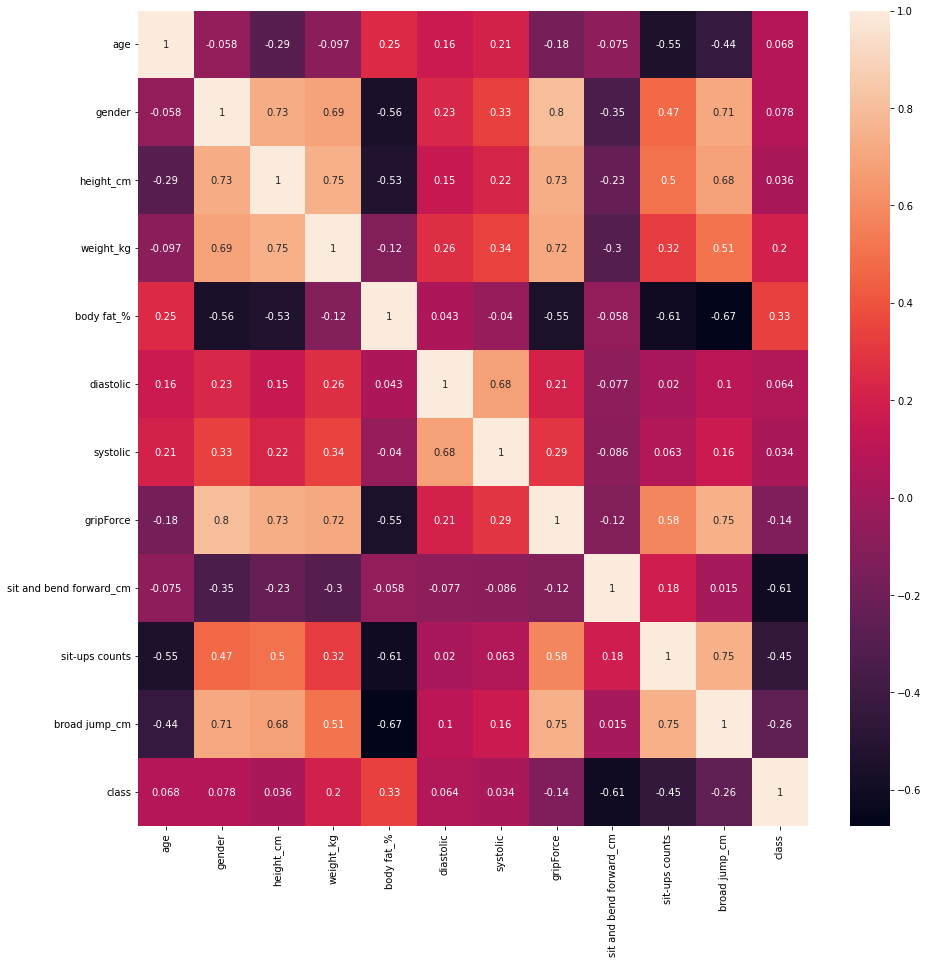

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

## Train Test and split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,3
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,3
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


In [27]:
X=df.drop('class',axis=1)
y=df['class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standard Scalar

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()

In [31]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Models

## Random Forest

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [33]:
M1=RandomForestClassifier()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print(classification_report(y_test,P1))
print('\n')
print(confusion_matrix(y_test, P1))
print('\n')
accuracy=accuracy_score(y_test, P1)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M1.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       0.71      0.86      0.78       658
           2       0.58      0.58      0.58       637
           3       0.75      0.67      0.71       711
           4       0.89      0.80      0.85       647

    accuracy                           0.73      2653
   macro avg       0.73      0.73      0.73      2653
weighted avg       0.73      0.73      0.73      2653



[[565  89   4   0]
 [165 372  78  22]
 [ 58 135 478  40]
 [  8  41  78 520]]


Accuracy: 72.94%
ROC AUC Score 0.9096812262656007


## Predictions and Evaluations From Top feature

In [34]:
from sklearn.feature_selection import RFE

In [35]:
M2=RFE(M1,n_features_to_select=9)
M2.fit(X_train,y_train)
P2=M1.predict(X_test)
print(classification_report(y_test,P2))
print('\n')
print(confusion_matrix(y_test, P2))
print('\n')
accuracy=accuracy_score(y_test, P2)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M2.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       0.71      0.86      0.78       658
           2       0.58      0.58      0.58       637
           3       0.75      0.67      0.71       711
           4       0.89      0.80      0.85       647

    accuracy                           0.73      2653
   macro avg       0.73      0.73      0.73      2653
weighted avg       0.73      0.73      0.73      2653



[[565  89   4   0]
 [165 372  78  22]
 [ 58 135 478  40]
 [  8  41  78 520]]


Accuracy: 72.94%
ROC AUC Score 0.9071267800836227


# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
M3=DecisionTreeClassifier()
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print(classification_report(y_test,P3))
print('\n')
print(confusion_matrix(y_test, P3))
print('\n')
accuracy=accuracy_score(y_test, P3)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M3.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       0.69      0.71      0.70       658
           2       0.49      0.52      0.51       637
           3       0.63      0.59      0.61       711
           4       0.80      0.79      0.79       647

    accuracy                           0.65      2653
   macro avg       0.65      0.65      0.65      2653
weighted avg       0.65      0.65      0.65      2653



[[465 134  48  11]
 [139 333 126  39]
 [ 56 154 420  81]
 [ 13  52  73 509]]


Accuracy: 65.10%
ROC AUC Score 0.7676838831277824


## Naive Bayes classifier

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
M4=GaussianNB()
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test, P4))
print('\n')
accuracy=accuracy_score(y_test, P4)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M4.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       0.59      0.72      0.65       658
           2       0.38      0.37      0.38       637
           3       0.57      0.40      0.47       711
           4       0.63      0.71      0.67       647

    accuracy                           0.55      2653
   macro avg       0.54      0.55      0.54      2653
weighted avg       0.54      0.55      0.54      2653



[[473 147  13  25]
 [222 236 100  79]
 [ 91 172 284 164]
 [ 22  62 105 458]]


Accuracy: 54.69%
ROC AUC Score 0.8021483590398961


## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

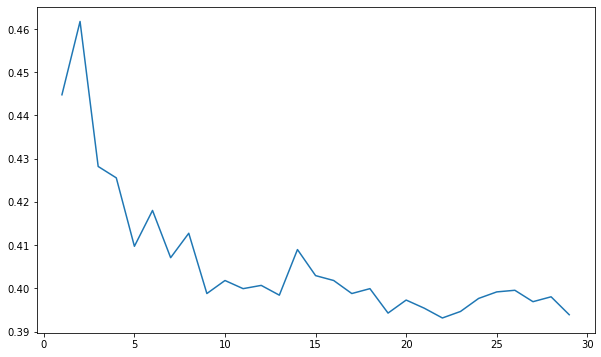

In [41]:
error_Mat=[]
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range (1,30),error_Mat)

In [42]:
M5=KNeighborsClassifier(n_neighbors=19)
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print(classification_report(y_test,P5))
print('\n')
print(confusion_matrix(y_test, P5))
print('\n')
accuracy=accuracy_score(y_test, P5)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M5.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       0.60      0.84      0.70       658
           2       0.41      0.45      0.43       637
           3       0.61      0.50      0.55       711
           4       0.92      0.63      0.75       647

    accuracy                           0.61      2653
   macro avg       0.63      0.61      0.61      2653
weighted avg       0.63      0.61      0.61      2653



[[556 101   1   0]
 [261 285  77  14]
 [ 90 241 356  24]
 [ 18  71 148 410]]


Accuracy: 60.57%
ROC AUC Score 0.8473540530993852


## GB Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
M6=GradientBoostingClassifier()
M6.fit(X_train,y_train)
P6=M6.predict(X_test)
print(classification_report(y_test,P6))
print('\n')
print(confusion_matrix(y_test, P6))
print('\n')
accuracy=accuracy_score(y_test, P6)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M6.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       0.69      0.86      0.76       658
           2       0.55      0.56      0.56       637
           3       0.72      0.62      0.67       711
           4       0.90      0.79      0.84       647

    accuracy                           0.71      2653
   macro avg       0.72      0.71      0.71      2653
weighted avg       0.72      0.71      0.71      2653



[[566  90   2   0]
 [174 359  85  19]
 [ 72 162 440  37]
 [ 10  42  81 514]]


Accuracy: 70.83%
ROC AUC Score 0.9008801570722667


## Histogram Boosting Classifier

In [45]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [46]:
M7=HistGradientBoostingClassifier()
M7.fit(X_train,y_train)
P7=M7.predict(X_test)
print(classification_report(y_test,P7))
print('\n')
print(confusion_matrix(y_test, P7))
print('\n')
accuracy=accuracy_score(y_test, P7)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M7.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       0.72      0.88      0.79       658
           2       0.62      0.63      0.63       637
           3       0.77      0.68      0.72       711
           4       0.91      0.83      0.86       647

    accuracy                           0.75      2653
   macro avg       0.76      0.75      0.75      2653
weighted avg       0.76      0.75      0.75      2653



[[576  74   7   1]
 [152 403  67  15]
 [ 57 135 480  39]
 [ 11  36  66 534]]


Accuracy: 75.12%
ROC AUC Score 0.9209910764428987


## XGB Boosting

In [47]:
from xgboost import XGBClassifier

In [48]:
M8=XGBClassifier()
M8.fit(X_train,y_train)
P8=M8.predict(X_test)
print(classification_report(y_test,P8))
print('\n')
print(confusion_matrix(y_test, P8))
print('\n')
accuracy=accuracy_score(y_test, P8)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M8.predict_proba(X_test),multi_class='ovr'))

[14:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.75      0.87      0.80       658
           2       0.60      0.62      0.61       637
           3       0.75      0.68      0.72       711
           4       0.92      0.83      0.87       647

    accuracy                           0.75      2653
   macro avg       0.75      0.75      0.75      2653
weighted avg       0.75      0.75      0.75      2653



[[571  80   7   0]
 [135 393  91  18]
 [ 48 147 485  31]
 [ 11  35  61 540]]


Accuracy: 74.97%
ROC AUC Score 0.9172542443680005


## CAT boosting

In [49]:
from catboost import CatBoostClassifier

In [50]:
M9=CatBoostClassifier()
M9.fit(X_train,y_train)
P9=M9.predict(X_test)
print(classification_report(y_test,P9))
print('\n')
print(confusion_matrix(y_test, P9))
print('\n')
accuracy=accuracy_score(y_test, P9)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M9.predict_proba(X_test),multi_class='ovr'))

Learning rate set to 0.089256
0:	learn: 1.3218582	total: 163ms	remaining: 2m 43s
1:	learn: 1.2717099	total: 195ms	remaining: 1m 37s
2:	learn: 1.2305637	total: 224ms	remaining: 1m 14s
3:	learn: 1.1932050	total: 268ms	remaining: 1m 6s
4:	learn: 1.1613780	total: 300ms	remaining: 59.7s
5:	learn: 1.1316166	total: 328ms	remaining: 54.3s
6:	learn: 1.1056972	total: 359ms	remaining: 50.9s
7:	learn: 1.0832946	total: 378ms	remaining: 46.9s
8:	learn: 1.0642629	total: 402ms	remaining: 44.3s
9:	learn: 1.0443804	total: 425ms	remaining: 42.1s
10:	learn: 1.0280472	total: 447ms	remaining: 40.2s
11:	learn: 1.0135830	total: 470ms	remaining: 38.7s
12:	learn: 1.0010238	total: 492ms	remaining: 37.4s
13:	learn: 0.9872891	total: 516ms	remaining: 36.4s
14:	learn: 0.9769840	total: 540ms	remaining: 35.4s
15:	learn: 0.9629453	total: 579ms	remaining: 35.6s
16:	learn: 0.9507053	total: 632ms	remaining: 36.5s
17:	learn: 0.9417438	total: 667ms	remaining: 36.4s
18:	learn: 0.9328048	total: 706ms	remaining: 36.4s
19:	lear

In [51]:
print(classification_report(y_test,P9))
print('\n')
print(confusion_matrix(y_test, P9))
print('\n')
accuracy=accuracy_score(y_test, P9)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M9.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       0.71      0.84      0.77       658
           2       0.58      0.57      0.58       637
           3       0.74      0.69      0.71       711
           4       0.91      0.81      0.86       647

    accuracy                           0.73      2653
   macro avg       0.74      0.73      0.73      2653
weighted avg       0.74      0.73      0.73      2653



[[554  94  10   0]
 [161 365  95  16]
 [ 52 131 492  36]
 [ 12  39  69 527]]


Accuracy: 73.05%
ROC AUC Score 0.9146439497815665


## Light GBM

In [52]:
from lightgbm import LGBMClassifier

In [53]:
M10=LGBMClassifier()
M10.fit(X_train,y_train)
P10=M10.predict(X_test)
print(classification_report(y_test,P10))
print('\n')
print(confusion_matrix(y_test, P10))
print('\n')
accuracy=accuracy_score(y_test, P10)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M10.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       0.73      0.88      0.80       658
           2       0.60      0.62      0.61       637
           3       0.77      0.67      0.71       711
           4       0.91      0.82      0.86       647

    accuracy                           0.75      2653
   macro avg       0.75      0.75      0.75      2653
weighted avg       0.75      0.75      0.75      2653



[[582  66  10   0]
 [157 394  68  18]
 [ 53 152 474  32]
 [  9  45  64 529]]


Accuracy: 74.59%
ROC AUC Score 0.9228945853342729


## Neural_network

In [54]:
from sklearn.neural_network import MLPClassifier

In [64]:
M11=MLPClassifier(hidden_layer_sizes=(1000,))
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print(classification_report(y_test,P11))
print('\n')
print(confusion_matrix(y_test, P11))
print('\n')
accuracy=accuracy_score(y_test, P11)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M11.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       0.71      0.87      0.78       658
           2       0.62      0.54      0.58       637
           3       0.71      0.70      0.70       711
           4       0.89      0.81      0.85       647

    accuracy                           0.73      2653
   macro avg       0.73      0.73      0.73      2653
weighted avg       0.73      0.73      0.73      2653



[[570  65  21   2]
 [164 346 104  23]
 [ 61 116 497  37]
 [ 11  32  78 526]]


Accuracy: 73.09%
ROC AUC Score 0.9146178247728166


## Bagging classifier.

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [56]:
from sklearn.ensemble import BaggingClassifier

In [58]:
M12=BaggingClassifier(base_estimator=M10)
M12.fit(X_train,y_train)
P12=M12.predict(X_test)
print(classification_report(y_test,P12))
print('\n')
print(confusion_matrix(y_test, P12))
print('\n')
accuracy=accuracy_score(y_test, P12)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,M12.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           1       0.73      0.90      0.80       658
           2       0.60      0.62      0.61       637
           3       0.77      0.66      0.71       711
           4       0.92      0.82      0.87       647

    accuracy                           0.75      2653
   macro avg       0.75      0.75      0.75      2653
weighted avg       0.76      0.75      0.75      2653



[[590  63   5   0]
 [157 395  67  18]
 [ 55 159 468  29]
 [ 11  36  69 531]]


Accuracy: 74.78%
ROC AUC Score 0.9222804760804932


In [59]:
Name=['Random Forest Classifier','Decision Tree','Naive Bayes classifier', 'KNN', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM',
      'CAT Boosting','Neural_Network','Bagging_classifier']
clfs= [RandomForestClassifier(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(n_neighbors=19),
      GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),MLPClassifier(),
       CatBoostClassifier(),BaggingClassifier(base_estimator=M10)]

In [60]:
results=[]

for i in clfs:
    i.fit(X_train,y_train)
    score=roc_auc_score(y_test,i.predict_proba(X_test),multi_class='ovr')
    results.append(score)
    
Score=pd.DataFrame(data=results,index=Name)
Score.columns=['Accuracy']

[14:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.089256
0:	learn: 1.3218582	total: 16.4ms	remaining: 16.4s
1:	learn: 1.2717099	total: 30.5ms	remaining: 15.2s
2:	learn: 1.2305637	total: 45.6ms	remaining: 15.2s
3:	learn: 1.1932050	total: 61.4ms	remaining: 15.3s
4:	learn: 1.1613780	total: 76.4ms	remaining: 15.2s
5:	learn: 1.1316166	total: 92ms	remaining: 15.2s
6:	learn: 1.1056972	total: 107ms	remaining: 15.1s
7:	learn: 1.0832946	total: 121ms	remaining: 15.1s
8:	learn: 1.0642629	total: 136ms	remaining: 15s
9:	learn: 1.0443804	total: 150ms	remaining: 14.9s
10:	learn: 1.0280472	total: 165ms	remaining: 14.8s
11:	learn: 1.0135830	total: 179ms	remaining: 14.7s
12:	learn: 1.0010238	total: 200ms	remaining: 15.2s
13:	

In [62]:
Score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Light GBM,0.922895
Histogram Boosting Classifier,0.921621
Bagging_classifier,0.921391
CAT Boosting,0.919706
XGB Boosting,0.917254
Neural_Network,0.914644
Random Forest Classifier,0.909024
GBBoosting,0.872591
KNN,0.847354
Naive Bayes classifier,0.802148
